In [78]:
import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt

mi.set_variant("llvm_ad_spectral_polarized")
mi.variants()

['scalar_rgb',
 'scalar_spectral',
 'scalar_spectral_polarized',
 'llvm_ad_rgb',
 'llvm_ad_mono',
 'llvm_ad_mono_polarized',
 'llvm_ad_spectral',
 'llvm_ad_spectral_polarized',
 'cuda_ad_rgb',
 'cuda_ad_mono',
 'cuda_ad_mono_polarized',
 'cuda_ad_spectral',
 'cuda_ad_spectral_polarized']

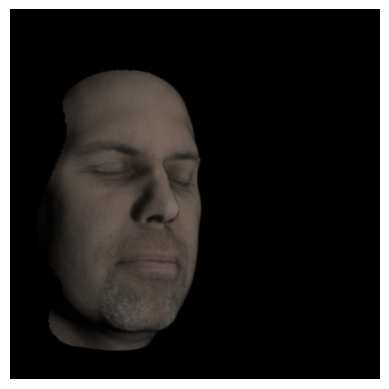

In [96]:
scene = mi.load_file("face_normal_scene.xml")
image = mi.render(scene, spp=512)

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))
plt.show()